In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from datetime import datetime, timezone, timedelta

In [38]:
#user input, multiple
lakes = ["01004000","01007300","01004600"]

In [39]:
lakes_data = pd.read_csv(f"Resources/fish_catch_info/fish_catch.csv",converters={"lake_ID": str})

In [40]:
lakes_df = lakes_data
lakes_df["survey_date"] = pd.to_datetime(lakes_df["survey_date"],format="%Y-%m-%d")
lakes_df["numeric_survey_date"] = pd.to_numeric(lakes_df["survey_date"])
lakes_df = lakes_df.sort_values("survey_date")
lakes_df = lakes_df.reset_index(drop=True)

lakes_df.head()

,lake_ID,CPUE,averageWeight,gear,gearCount,quartileCount,quartileWeight,species,survey_ID,survey_date,totalCatch,totalWeight,numeric_survey_date
0,01003100,1.50,0.13,Standard trap nets,4.0,1.8-26.3,0.1-0.4,BLB,113099,1976-07-28,6,0.8,207360000000000000
1,01003100,20.50,0.23,Standard gill nets,2.0,2.5-23.3,0.1-0.2,YEP,113099,1976-07-28,41,9.5,207360000000000000
2,01003100,2.00,0.07,Standard trap nets,4.0,0.3-1.9,0.1-0.1,GOS,113099,1976-07-28,8,0.6,207360000000000000
3,01003100,1.50,0.23,Standard gill nets,2.0,1.5-9.5,0.2-0.7,BRB,113099,1976-07-28,3,0.7,207360000000000000
4,01003100,7.25,0.22,Standard trap nets,4.0,1.9-13.0,0.2-0.4,BLC,113099,1976-07-28,29,6.3,207360000000000000


In [41]:
i=0
for _ in lakes_df["CPUE"]:
    try:
        np.float64(_)
        i = i + 1
    except ValueError:
        print(i, _,"valueerror")
        lakes_df = lakes_df.drop([i])
        i = i + 1

In [42]:
lakes_df["CPUE"] = pd.to_numeric(lakes_df["CPUE"])

In [43]:
lakes_df.dtypes

lake_ID                        object
CPUE                          float64
averageWeight                 float64
gear                           object
gearCount                     float64
quartileCount                  object
quartileWeight                 object
species                        object
survey_ID                       int64
survey_date            datetime64[ns]
totalCatch                      int64
totalWeight                   float64
numeric_survey_date             int64
dtype: object

In [47]:
#user input, singular
species = "NOP"

In [48]:
lake_boxplot_cpue_list = []
for lakeid in lakes:
    species_cpue = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["lake_ID"] == lakeid), "CPUE"]
    lake_boxplot_cpue_list.append(species_cpue)

#### Print box plots for each lake

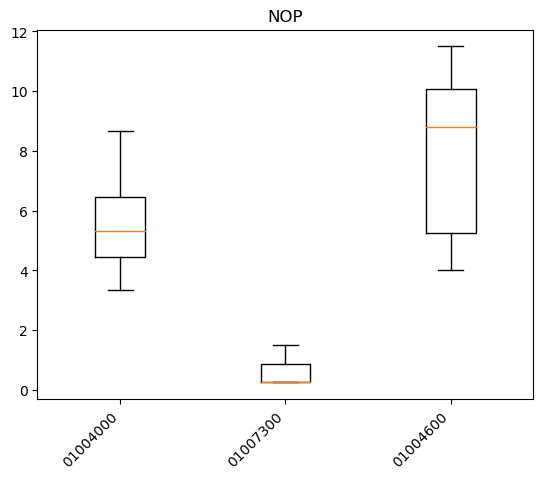

In [49]:
plt.boxplot(lake_boxplot_cpue_list)
labels = lakes
ticks = range(1, len(lakes)+1)
plt.xticks(ticks=ticks, labels=labels, rotation=45, ha="right")
plt.title(species)
plt.show()

In [53]:
#user input, singular
start_date = np.datetime64('2000-02-25')

In [54]:
#all dates after start date
lake_scatter_cpue_list = []
lake_scatter_survey_date_list = []
lake_scatter_numeric_survey_date_list = []
for lakeid in lakes:
    species_cpue = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["survey_date"] > start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "CPUE"]
    species_survey_date = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["survey_date"] > start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "survey_date"]
    lake_scatter_numeric_survey_date = (lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["survey_date"] > start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "numeric_survey_date"])
    lake_scatter_cpue_list.append(species_cpue)
    lake_scatter_survey_date_list.append(species_survey_date)
    lake_scatter_numeric_survey_date_list.append(lake_scatter_numeric_survey_date)

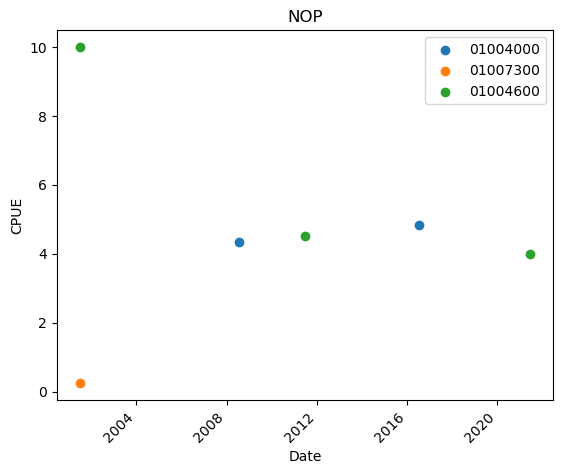

In [55]:
for _ in range(len(lakes)):
    plt.scatter(lake_scatter_survey_date_list[_],lake_scatter_cpue_list[_], label=lakes[_])
plt.title(species)
plt.ylabel("CPUE")
plt.xlabel("Date")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best")
plt.show()

#### Plot CPUE and regression for each lake.

Notes:
Only 1 data point exists for 01007300


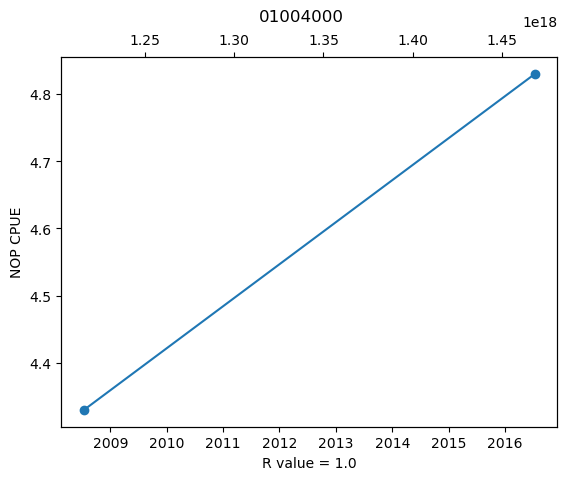

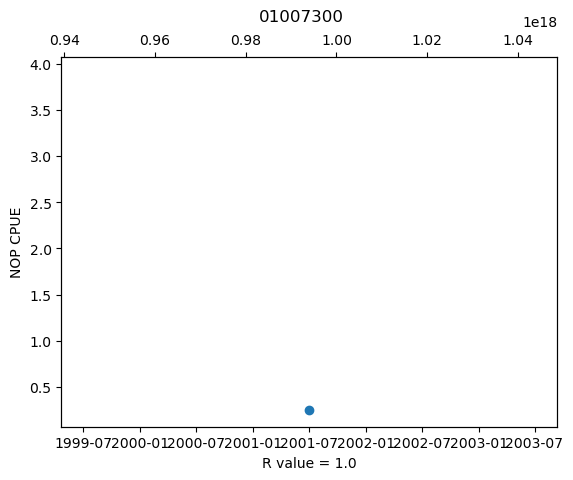

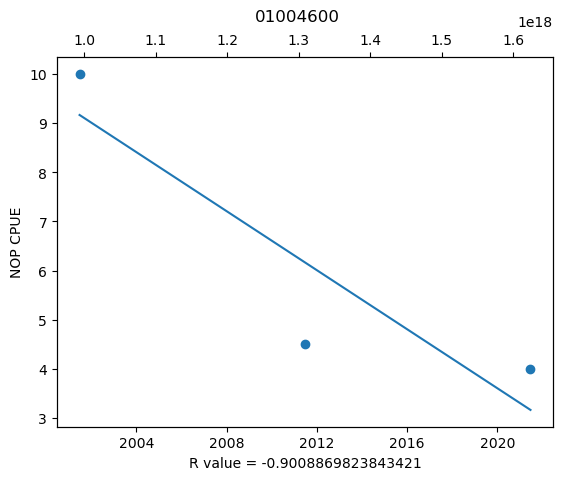

In [56]:
print("Notes:")
for lake in range(len(lakes)):
    if len(lake_scatter_numeric_survey_date_list[lake]) == 0:
        print(f"Survey Data Empty for {lakes[lake]}")
    elif len(lake_scatter_numeric_survey_date_list[lake]) == 1:
        print(f"Only 1 data point exists for {lakes[lake]}")
    else:
        regression_values = linregress(lake_scatter_numeric_survey_date_list[lake],lake_scatter_cpue_list[lake])
    fig, ax1 = plt.subplots(1,1)
    fig.suptitle(lakes[lake])
    ax1.scatter(lake_scatter_survey_date_list[lake],lake_scatter_cpue_list[lake], label=lakes[lake])
    ax1.set_ylabel(f"{species} CPUE")
    ax1.set_xlabel(f"R value = {regression_values.rvalue}")
    ax2 = ax1.twiny()
    ax2.plot(lake_scatter_numeric_survey_date_list[lake],(regression_values.slope*lake_scatter_numeric_survey_date_list[lake] + regression_values.intercept))

plt.show()